In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the image
image_path = 'C:\\ESTERA\\CCT\\BANANAS\\g001.jpg'
green_image = cv2.imread(image_path)


In [3]:
# Split the channels
blue_channel, green_channel, red_channel = cv2.split(green_image)

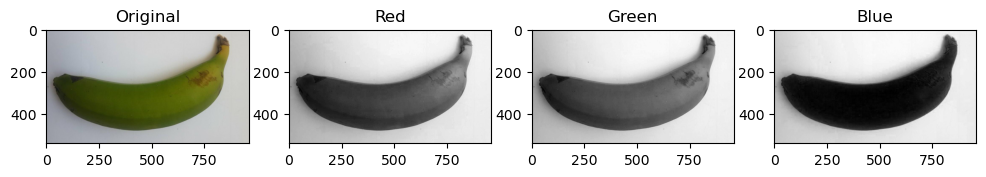

In [4]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Display the original image
axs[0].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Display the red channel
axs[1].imshow(red_channel, cmap='gray')
axs[1].set_title('Red')

# Display the green channel
axs[2].imshow(green_channel, cmap='gray')
axs[2].set_title('Green')

# Display the blue channel
axs[3].imshow(blue_channel, cmap='gray')
axs[3].set_title('Blue')

# Show the plots
plt.show()

In [5]:
# Load the image
image_path = 'C:\\ESTERA\\CCT\\BANANAS\\Y001.jpg'
yellow_image = cv2.imread(image_path)

In [6]:
# Split the channels
blue_channel, green_channel, red_channel = cv2.split(yellow_image)

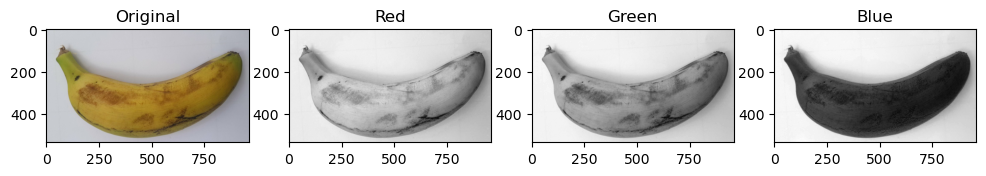

In [7]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Display the original image
axs[0].imshow(cv2.cvtColor(yellow_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Display the red channel
axs[1].imshow(red_channel, cmap='gray')
axs[1].set_title('Red')

# Display the green channel
axs[2].imshow(green_channel, cmap='gray')
axs[2].set_title('Green')

# Display the blue channel
axs[3].imshow(blue_channel, cmap='gray')
axs[3].set_title('Blue')

# Show the plots
plt.show()

In [8]:
# Load the image
image_path = 'C:\\ESTERA\\CCT\\BANANAS\\R001.jpg'
ripe_image = cv2.imread(image_path)

In [9]:
# Split the channels
blue_channel, green_channel, red_channel = cv2.split(ripe_image)

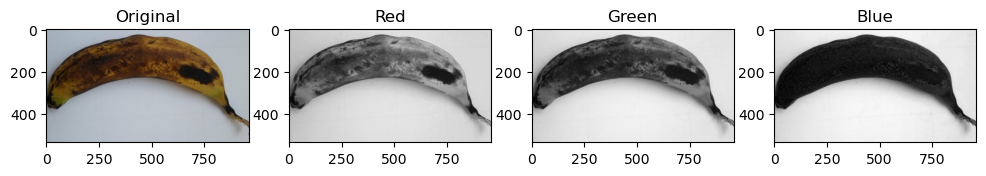

In [10]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Display the original image
axs[0].imshow(cv2.cvtColor(ripe_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Display the red channel
axs[1].imshow(red_channel, cmap='gray')
axs[1].set_title('Red')

# Display the green channel
axs[2].imshow(green_channel, cmap='gray')
axs[2].set_title('Green')

# Display the blue channel
axs[3].imshow(blue_channel, cmap='gray')
axs[3].set_title('Blue')

# Show the plots
plt.show()

# CNN Model

In [4]:
file_path = 'C:\\ESTERA\\CCT\\BANANAS'

### Picture preprocessing

In [5]:
# Function to load and preprocess an image
def load_and_preprocess_image(file_path):
    # Load the image
    image = cv2.imread(file_path)
    
    # Resize the image to a consistent size (960x540)
    image = cv2.resize(image, (960, 540))
    
    # Scale picture to be between 0 and 1
    image = image.astype(np.float32) / 255.0
    
    return image

In [6]:
# Load and preprocess the dataset
image_paths = []
labels = []

# Loop through the class folders (Green, Yellow, Ripe)
for class_name in os.listdir(file_path):
    class_path = os.path.join(file_path, class_name)
    
    if os.path.isdir(class_path):
        # Labeling pictures based on folder name (Green = 0, Yellow = 1, Ripe = 2)
        if class_name.startswith('G'):
            label = 0
        elif class_name.startswith('Y'):
            label = 1
        elif class_name.startswith('R'):
            label = 2
        else:
            continue
        
        # Load and preprocess images in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_name.endswith('.jpg'):
                image = load_and_preprocess_image(image_path)
                image_paths.append(image_path)
                labels.append(label)

In [7]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### ML

In [8]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
X_test

['C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R018.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g061.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y095.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y083.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R069.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R077.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g074.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g057.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y088.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R097.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g080.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g076.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g026.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g011.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g093.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g006.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y066.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g018.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R026.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g031.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y026.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow

In [10]:
import time
import pandas as pd

In [11]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Model", 'Layers',"Filters", "Batch Size", "Duration (s)", "Loss", "Accuracy", "Validation Loss", "Validation Accuracy"])

### 1 layer

In [12]:
# Record the start time
start_time = time.time()

# Define the neural network model
model_1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 16
epochs = 10

history = model_1.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

result_to_append = pd.DataFrame({
    "Model": ["model_1"],
    'Layers':[1],
    "Filters": [32],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)


Epoch 1/10
13/13 [==============================] - 61s 4s/step - loss: 188.5377 - accuracy: 0.3720 - val_loss: 49.5069 - val_accuracy: 0.2889
Epoch 2/10
13/13 [==============================] - 49s 4s/step - loss: 35.1069 - accuracy: 0.3961 - val_loss: 4.7873 - val_accuracy: 0.6000
Epoch 3/10
13/13 [==============================] - 49s 4s/step - loss: 1.6329 - accuracy: 0.7488 - val_loss: 0.1574 - val_accuracy: 0.9111
Epoch 4/10
13/13 [==============================] - 50s 4s/step - loss: 0.1224 - accuracy: 0.9758 - val_loss: 0.2027 - val_accuracy: 0.9111
Epoch 5/10
13/13 [==============================] - 50s 4s/step - loss: 0.0338 - accuracy: 0.9855 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 50s 4s/step - loss: 0.0197 - accuracy: 0.9952 - val_loss: 0.0710 - val_accuracy: 0.9778
Epoch 7/10
13/13 [==============================] - 50s 4s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/10
13/13

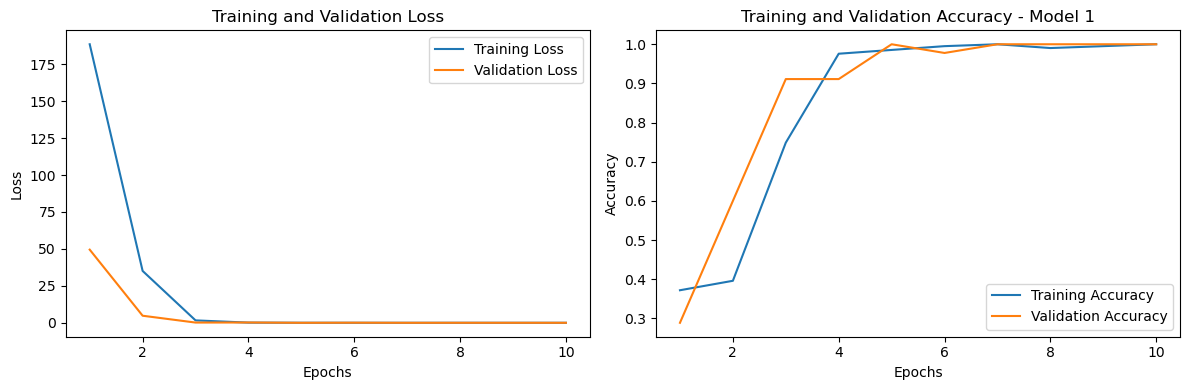

In [13]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Record the start time
start_time = time.time()

# Define the neural network model
model_2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model_2.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

result_to_append = pd.DataFrame({
    "Model": ["model_2"],
    'Layers':[1],
    "Filters": [32],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)


Epoch 1/10
7/7 [==============================] - 135s 13s/step - loss: 116.1408 - accuracy: 0.3961 - val_loss: 63.1686 - val_accuracy: 0.2889
Epoch 2/10
7/7 [==============================] - 58s 8s/step - loss: 18.9719 - accuracy: 0.4831 - val_loss: 3.6574 - val_accuracy: 0.7111
Epoch 3/10
7/7 [==============================] - 73s 11s/step - loss: 2.6685 - accuracy: 0.7101 - val_loss: 0.1532 - val_accuracy: 0.9556
Epoch 4/10
7/7 [==============================] - 46s 6s/step - loss: 0.3719 - accuracy: 0.9275 - val_loss: 0.3740 - val_accuracy: 0.8667
Epoch 5/10
7/7 [==============================] - 50s 7s/step - loss: 0.1169 - accuracy: 0.9517 - val_loss: 0.0456 - val_accuracy: 0.9778
Epoch 6/10
7/7 [==============================] - 48s 6s/step - loss: 0.0476 - accuracy: 0.9662 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 46s 6s/step - loss: 0.0269 - accuracy: 0.9903 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 8/10
7/7 [===========

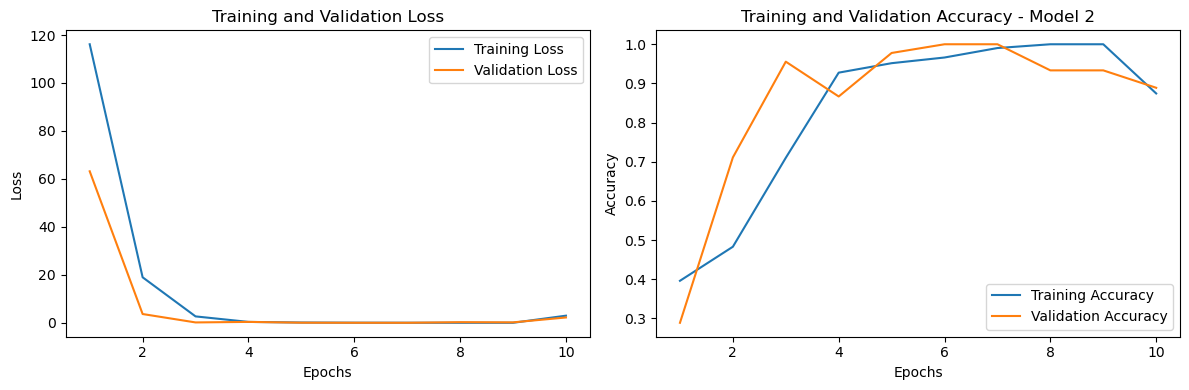

In [16]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
results_df


,Model,Layers,Filters,Batch Size,Duration (s),Loss,Accuracy,Validation Loss,Validation Accuracy
0,model_1,1,32,16,518.816488,0.005401,1.000000,0.004059,1.000000
1,model_2,1,32,32,594.582940,2.970388,0.874396,2.218704,0.888889


#### changed number of filters from 32 to 64

In [18]:
# Record the start time
start_time = time.time()

# Define the neural network model
model_3 = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 16
epochs = 10

history = model_3.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")


result_to_append = pd.DataFrame({
    "Model": ["model_3"],
    'Layers':[1],
    "Filters": [64],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)

Epoch 1/10
13/13 [==============================] - 1243s 93s/step - loss: 186.4151 - accuracy: 0.4493 - val_loss: 17.9617 - val_accuracy: 0.7333
Epoch 2/10
13/13 [==============================] - 1324s 97s/step - loss: 15.8501 - accuracy: 0.7633 - val_loss: 3.6690 - val_accuracy: 0.8667
Epoch 3/10
13/13 [==============================] - 581s 45s/step - loss: 2.0020 - accuracy: 0.9275 - val_loss: 2.8495 - val_accuracy: 0.8444
Epoch 4/10
13/13 [==============================] - 883s 69s/step - loss: 0.1772 - accuracy: 0.9758 - val_loss: 0.2827 - val_accuracy: 0.9556
Epoch 5/10
13/13 [==============================] - 651s 49s/step - loss: 2.1168 - accuracy: 0.9275 - val_loss: 0.7289 - val_accuracy: 0.9333
Epoch 6/10
13/13 [==============================] - 590s 44s/step - loss: 0.8475 - accuracy: 0.9565 - val_loss: 0.0905 - val_accuracy: 0.9778
Epoch 7/10
13/13 [==============================] - 780s 62s/step - loss: 0.2555 - accuracy: 0.9807 - val_loss: 0.6508 - val_accuracy: 0.9556


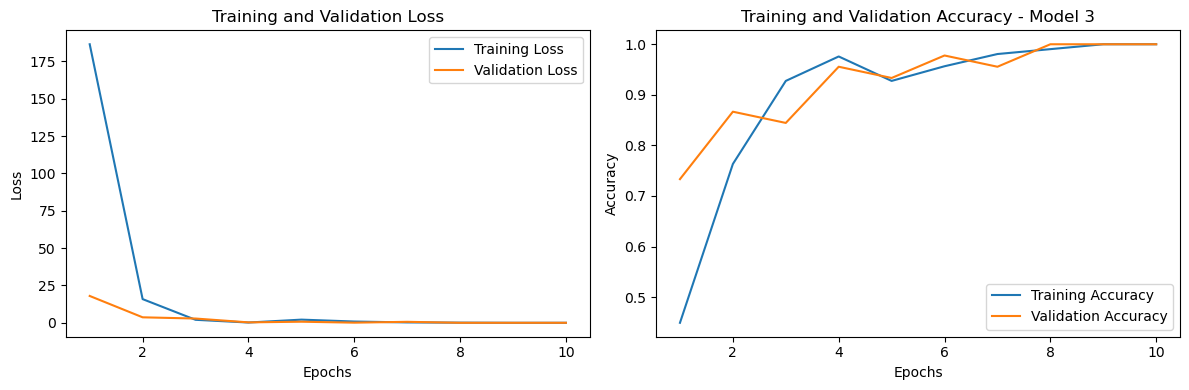

In [19]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Record the start time
start_time = time.time()

# Define the neural network model
model_4 = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model_4.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")


result_to_append = pd.DataFrame({
    "Model": ["model_4"],
    'Layers':[1],
    "Filters": [64],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)

Epoch 1/10
7/7 [==============================] - 2040s 270s/step - loss: 484.9917 - accuracy: 0.3961 - val_loss: 210.0092 - val_accuracy: 0.3111
Epoch 2/10
7/7 [==============================] - 1903s 267s/step - loss: 149.5087 - accuracy: 0.3768 - val_loss: 43.9010 - val_accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 2049s 276s/step - loss: 29.7656 - accuracy: 0.5652 - val_loss: 2.7399 - val_accuracy: 0.9111
Epoch 4/10
7/7 [==============================] - 2172s 293s/step - loss: 0.8038 - accuracy: 0.9082 - val_loss: 0.5869 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 1861s 253s/step - loss: 0.2065 - accuracy: 0.9469 - val_loss: 1.4719 - val_accuracy: 0.9333
Epoch 6/10
7/7 [==============================] - 1964s 283s/step - loss: 0.1773 - accuracy: 0.9614 - val_loss: 0.4795 - val_accuracy: 0.9778
Epoch 7/10
7/7 [==============================] - 1883s 268s/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.3808 - val_accuracy: 0.933

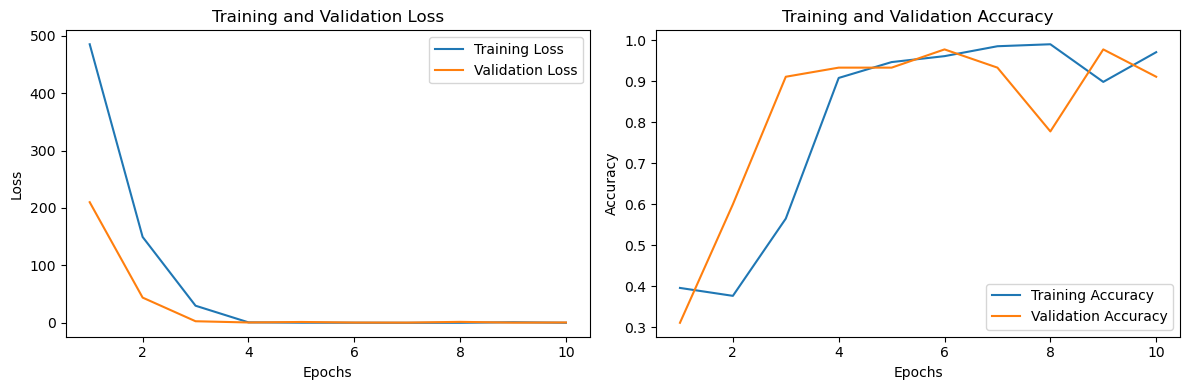

In [21]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 3 layers

In [27]:
# Record the start time
start_time = time.time()

# Define the neural network model
model_5 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 16
epochs = 10

history = model_5.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")


result_to_append = pd.DataFrame({
    "Model": ["model_5"],
    'Layers':[3],
    "Filters": [32],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)

Epoch 1/10
13/13 [==============================] - 74s 5s/step - loss: 15.6435 - accuracy: 0.3816 - val_loss: 0.9229 - val_accuracy: 0.6444
Epoch 2/10
13/13 [==============================] - 67s 5s/step - loss: 0.7319 - accuracy: 0.7150 - val_loss: 1.4808 - val_accuracy: 0.3556
Epoch 3/10
13/13 [==============================] - 67s 5s/step - loss: 0.6445 - accuracy: 0.7633 - val_loss: 0.2959 - val_accuracy: 0.8889
Epoch 4/10
13/13 [==============================] - 67s 5s/step - loss: 0.2347 - accuracy: 0.9082 - val_loss: 0.1551 - val_accuracy: 0.9556
Epoch 5/10
13/13 [==============================] - 67s 5s/step - loss: 0.0683 - accuracy: 0.9758 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 68s 5s/step - loss: 0.0393 - accuracy: 0.9758 - val_loss: 0.4635 - val_accuracy: 0.8222
Epoch 7/10
13/13 [==============================] - 67s 5s/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/10
13/13 [=

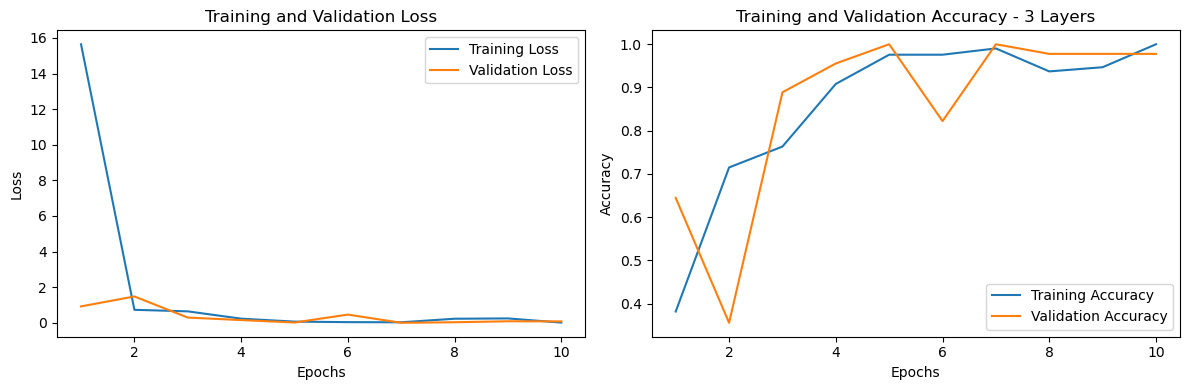

In [28]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - 3 Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Predict class probabilities for validation data
class_probabilities = model_4.predict(X_val_pixels)

# loop through the predictions for each image
for i, class_probs in enumerate(class_probabilities):
    print(f"Image {i+1} class probabilities:")
    for class_index, prob in enumerate(class_probs):
        print(f"Class {class_index}: {prob*100:.2f}%")

2/2 [==============================] - 7s 782ms/step
Image 1 class probabilities:
Class 0: 0.00%
Class 1: 0.01%
Class 2: 99.99%
Image 2 class probabilities:
Class 0: 0.00%
Class 1: 100.00%
Class 2: 0.00%
Image 3 class probabilities:
Class 0: 0.00%
Class 1: 0.03%
Class 2: 99.97%
Image 4 class probabilities:
Class 0: 100.00%
Class 1: 0.00%
Class 2: 0.00%
Image 5 class probabilities:
Class 0: 100.00%
Class 1: 0.00%
Class 2: 0.00%
Image 6 class probabilities:
Class 0: 100.00%
Class 1: 0.00%
Class 2: 0.00%
Image 7 class probabilities:
Class 0: 0.00%
Class 1: 100.00%
Class 2: 0.00%
Image 8 class probabilities:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 100.00%
Image 9 class probabilities:
Class 0: 0.00%
Class 1: 99.96%
Class 2: 0.04%
Image 10 class probabilities:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 100.00%
Image 11 class probabilities:
Class 0: 0.00%
Class 1: 100.00%
Class 2: 0.00%
Image 12 class probabilities:
Class 0: 100.00%
Class 1: 0.00%
Class 2: 0.00%
Image 13 class probabilities:
Class

In [30]:
# Record the start time
start_time = time.time()

# Define the neural network model
model_6 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model_6.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")


result_to_append = pd.DataFrame({
    "Model": ["model_6"],
    'Layers':[3],
    "Filters": [32],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)

Epoch 1/10
7/7 [==============================] - 91s 11s/step - loss: 33.8626 - accuracy: 0.3913 - val_loss: 1.4529 - val_accuracy: 0.3778
Epoch 2/10
7/7 [==============================] - 62s 9s/step - loss: 0.6850 - accuracy: 0.7681 - val_loss: 0.2431 - val_accuracy: 0.8444
Epoch 3/10
7/7 [==============================] - 61s 9s/step - loss: 0.2471 - accuracy: 0.9130 - val_loss: 0.2213 - val_accuracy: 0.8889
Epoch 4/10
7/7 [==============================] - 60s 9s/step - loss: 0.1095 - accuracy: 0.9662 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 62s 9s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 0.8889
Epoch 6/10
7/7 [==============================] - 61s 9s/step - loss: 0.0174 - accuracy: 0.9903 - val_loss: 0.0350 - val_accuracy: 0.9778
Epoch 7/10
7/7 [==============================] - 63s 9s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 8/10
7/7 [================

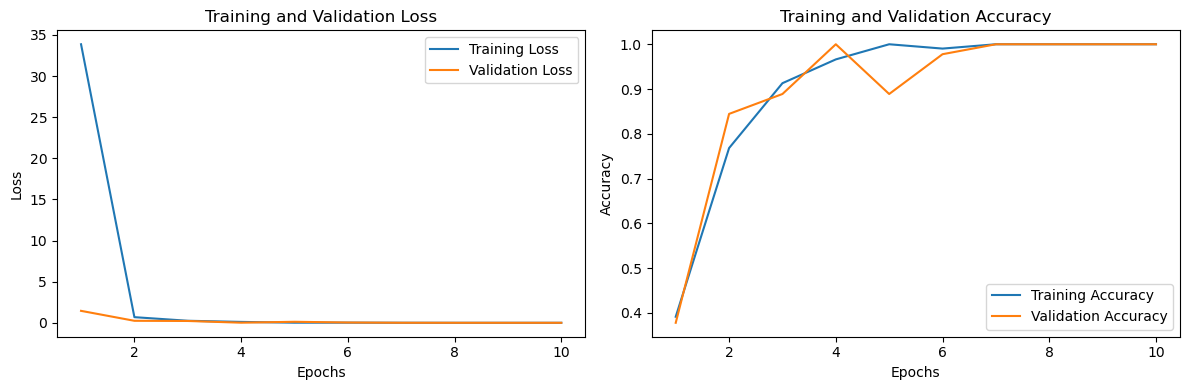

In [31]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Adding Dropout

In [42]:
from tensorflow.keras.layers import Dropout

# Record the start time
start_time = time.time()

# Define the neural network model
model_5_2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.5), 
    keras.layers.Dense(3, activation='softmax') 
])

# Compile the model
model_5_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train  
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val 
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 16
epochs = 10

history = model_5_2.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")


result_to_append = pd.DataFrame({
    "Model": ["model_5_Dropout"],
    'Layers':[3],
    "Filters": [32],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)

Epoch 1/10
13/13 [==============================] - 85s 6s/step - loss: 7.8756 - accuracy: 0.4251 - val_loss: 0.5268 - val_accuracy: 0.7111
Epoch 2/10
13/13 [==============================] - 80s 6s/step - loss: 0.4797 - accuracy: 0.8068 - val_loss: 0.1951 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 77s 6s/step - loss: 0.1883 - accuracy: 0.9469 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 77s 6s/step - loss: 0.1573 - accuracy: 0.9565 - val_loss: 0.1765 - val_accuracy: 0.9111
Epoch 5/10
13/13 [==============================] - 76s 6s/step - loss: 0.0716 - accuracy: 0.9903 - val_loss: 9.7595e-04 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 72s 6s/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 71s 6s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 0.9778
Epoch 8/10
13/13

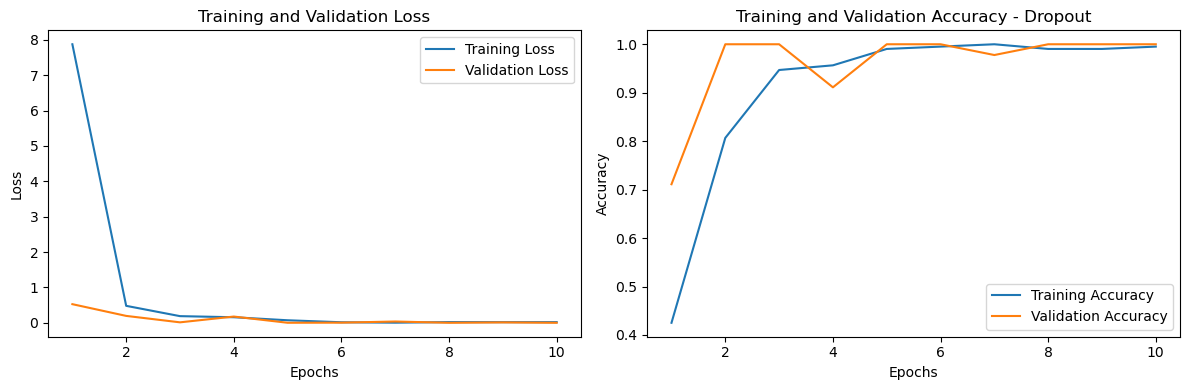

In [44]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Early Stop

In [45]:
# Record the start time
start_time = time.time()

# Define the neural network model
model_4_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model_4_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
    )

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 16
epochs = 10

history = model_4_3.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)


# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")


result_to_append = pd.DataFrame({
    "Model": ["model_4_Early_Stop"],
    'Layers':[3],
    "Filters": [32],
    "Batch Size": [batch_size],
    "Duration (s)": [elapsed_time],
    "Loss": [history.history["loss"][-1]],
    "Accuracy": [history.history["accuracy"][-1]],
    "Validation Loss": [history.history["val_loss"][-1]],
    "Validation Accuracy": [history.history["val_accuracy"][-1]]
})
results_df = pd.concat([results_df, result_to_append], ignore_index=True)

Epoch 1/10
13/13 [==============================] - 83s 6s/step - loss: 6.6550 - accuracy: 0.4348 - val_loss: 0.8126 - val_accuracy: 0.6222
Epoch 2/10
13/13 [==============================] - 76s 6s/step - loss: 0.7040 - accuracy: 0.6618 - val_loss: 0.2299 - val_accuracy: 0.9333
Epoch 3/10
13/13 [==============================] - 76s 6s/step - loss: 0.2941 - accuracy: 0.8696 - val_loss: 0.3442 - val_accuracy: 0.8222
Epoch 4/10
13/13 [==============================] - 78s 6s/step - loss: 0.1013 - accuracy: 0.9517 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 76s 6s/step - loss: 0.0991 - accuracy: 0.9758 - val_loss: 0.0951 - val_accuracy: 0.9556
Epoch 6/10
13/13 [==============================] - 76s 6s/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 76s 6s/step - loss: 0.0064 - accuracy: 0.9952 - val_loss: 0.0467 - val_accuracy: 0.9778
Epoch 8/10
13/13 [==

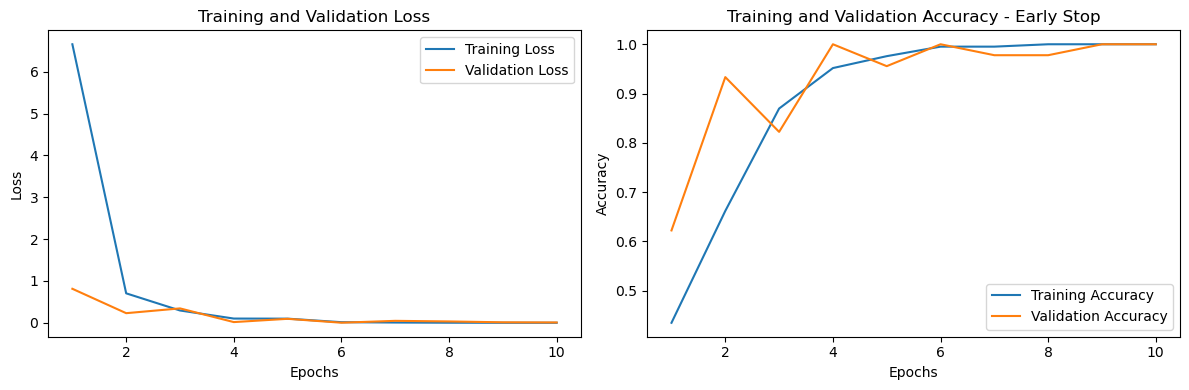

In [46]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Early Stop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
results_df

,Model,Layers,Filters,Batch Size,Duration (s),Loss,Accuracy,Validation Loss,Validation Accuracy
0,model_1,1,32,16,518.816488,0.005401,1.000000,4.059350e-03,1.000000
1,model_2,1,32,32,594.582940,2.970388,0.874396,2.218704e+00,0.888889
2,model_3,1,64,16,7735.846259,0.000014,1.000000,6.940576e-07,1.000000
3,model_4,1,64,32,19649.106509,0.101066,0.971014,6.111469e-01,0.911111
4,model_5,3,32,16,683.924907,0.013875,1.000000,8.068462e-02,0.977778
5,model_6,3,32,32,647.825878,0.000415,1.000000,2.847591e-04,1.000000
6,model_5_Dropouts,3,32,16,762.108685,0.018700,0.995200,2.138600e-04,1.000000
7,model_4_EarlyStop,3,32,16,1884.977732,0.000098,1.000000,8.000000e-03,1.000000
